In [1]:
# All import statements
import pandas as pd
from pandas import DataFrame
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
# Filepath and read
churn_data_path = 'C:/Users/Chad/Downloads/TelcoCustomerChurnCopy.csv'
churn_data = pd.read_csv(churn_data_path)


In [3]:
# Check data
churn_data


,customerID,OneMale,YesSenior,YesPartner,YesDependents,Tenure,YesPhoneService,YesInternetService,YesDSL,YesFiberOptic,...,ContractOneYear,ContractTwoYear,YesPaperlessBilling,YesElectronicCheck,YesMailedCheck,YesBankTransfer,YesCreditCard,MonthlyCharges,TotalCharges,YesChurn
0,7590-VHVEG,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,29.85,29.85,0.0
1,5575-GNVDE,1.0,0.0,0.0,0.0,34.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,56.95,1889.50,0.0
2,3668-QPYBK,1.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,53.85,108.15,1.0
3,7795-CFOCW,1.0,0.0,0.0,0.0,45.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,42.30,1840.75,0.0
4,9237-HQITU,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1.0,0.0,1.0,1.0,24.0,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,84.80,1990.50,0.0
7039,2234-XADUH,0.0,0.0,1.0,1.0,72.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,103.20,7362.90,0.0
7040,4801-JZAZL,0.0,0.0,1.0,1.0,11.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,29.60,346.45,0.0
7041,8361-LTMKD,1.0,1.0,1.0,0.0,4.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,74.40,306.60,1.0


In [4]:
# Check data
churn_data.columns[1:-1]


Index(['OneMale', 'YesSenior', 'YesPartner', 'YesDependents', 'Tenure',
       'YesPhoneService', 'YesInternetService', 'YesDSL', 'YesFiberOptic',
       'YesMultiLines', 'YesOnlineSecurity', 'YesOnlineBackup',
       'YesDeviceProtection', 'YesTechSupport', 'YesStreamingTV',
       'YesStreamingMovies', 'ContractMonthly', 'ContractOneYear',
       'ContractTwoYear', 'YesPaperlessBilling', 'YesElectronicCheck',
       'YesMailedCheck', 'YesBankTransfer', 'YesCreditCard', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')

In [5]:
# Assign variables
y = churn_data.YesChurn
churn_features = churn_data.columns[1:-1]
X = churn_data[churn_features]


In [6]:
# Xy copy to protect original data
X_copy = X.copy()
X_copy = X_copy.fillna(X_copy.mean())
y_copy = y.copy()


In [7]:
X_copy

,OneMale,YesSenior,YesPartner,YesDependents,Tenure,YesPhoneService,YesInternetService,YesDSL,YesFiberOptic,YesMultiLines,...,ContractMonthly,ContractOneYear,ContractTwoYear,YesPaperlessBilling,YesElectronicCheck,YesMailedCheck,YesBankTransfer,YesCreditCard,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,29.85,29.85
1,1.0,0.0,0.0,0.0,34.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,56.95,1889.50
2,1.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,53.85,108.15
3,1.0,0.0,0.0,0.0,45.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,42.30,1840.75
4,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,24.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,84.80,1990.50
7039,0.0,0.0,1.0,1.0,72.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,103.20,7362.90
7040,0.0,0.0,1.0,1.0,11.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,29.60,346.45
7041,1.0,1.0,1.0,0.0,4.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,74.40,306.60


count    7043.000000
mean        0.504756
std         0.500013
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: OneMale, dtype: float64


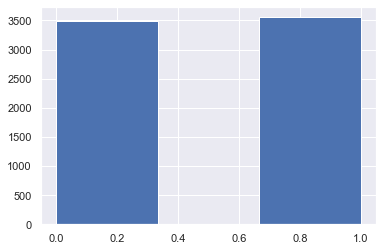

In [8]:
print(X_copy.OneMale.describe())
X_copy.OneMale.hist(bins=3)

count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: YesSenior, dtype: float64


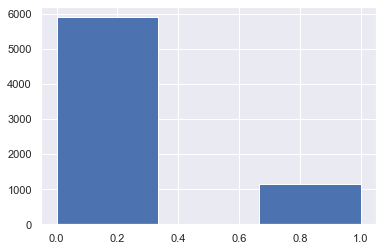

In [9]:
print(X_copy.YesSenior.describe())
X_copy.YesSenior.hist(bins=3)

count    7043.000000
mean        0.483033
std         0.499748
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: YesPartner, dtype: float64


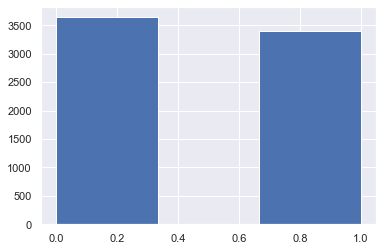

In [10]:
print(X_copy.YesPartner.describe())
X_copy.YesPartner.hist(bins=3)

count    7043.000000
mean        0.299588
std         0.458110
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: YesDependents, dtype: float64


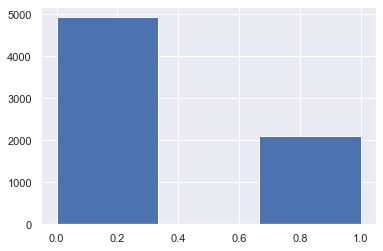

In [11]:
print(X_copy.YesDependents.describe())
X_copy.YesDependents.hist(bins=3)

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure, dtype: float64


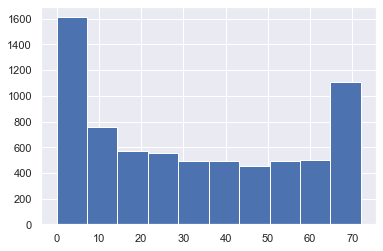

In [12]:
print(X_copy.Tenure.describe())
X_copy.Tenure.hist()

count    7043.000000
mean        0.903166
std         0.295752
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: YesPhoneService, dtype: float64


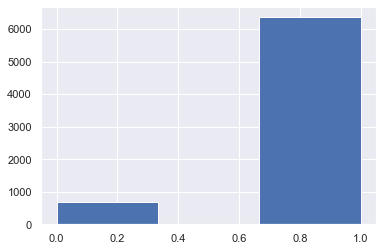

In [13]:
print(X_copy.YesPhoneService.describe())
X_copy.YesPhoneService.hist(bins=3)

count    7043.000000
mean        0.783331
std         0.412004
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: YesInternetService, dtype: float64


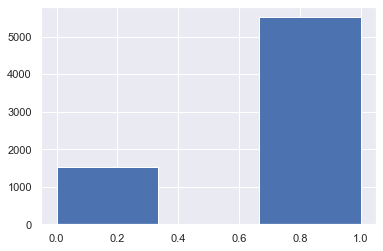

In [14]:
print(X_copy.YesInternetService.describe())
X_copy.YesInternetService.hist(bins=3)

count    7043.000000
mean        0.343746
std         0.474991
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: YesDSL, dtype: float64


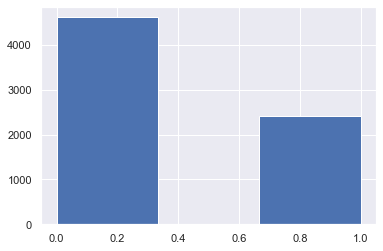

In [15]:
print(X_copy.YesDSL.describe())
X_copy.YesDSL.hist(bins=3)

count    7043.000000
mean        0.439585
std         0.496372
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: YesFiberOptic, dtype: float64


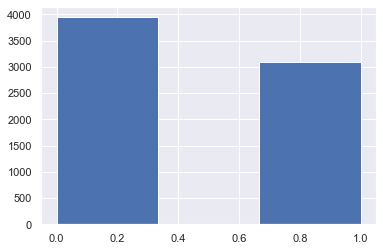

In [16]:
print(X_copy.YesFiberOptic.describe())
X_copy.YesFiberOptic.hist(bins=3)

count    7043.000000
mean        0.421837
std         0.493888
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: YesMultiLines, dtype: float64


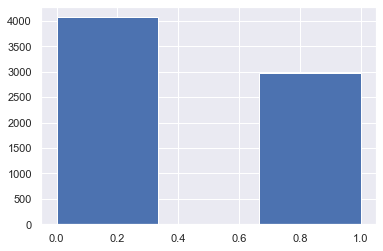

In [17]:
print(X_copy.YesMultiLines.describe())
X_copy.YesMultiLines.hist(bins=3)

count    7043.000000
mean        0.286668
std         0.452237
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: YesOnlineSecurity, dtype: float64


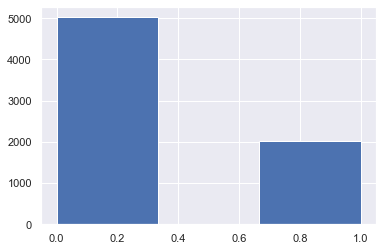

In [18]:
print(X_copy.YesOnlineSecurity.describe())
X_copy.YesOnlineSecurity.hist(bins=3)

count    7043.000000
mean        0.344881
std         0.475363
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: YesOnlineBackup, dtype: float64


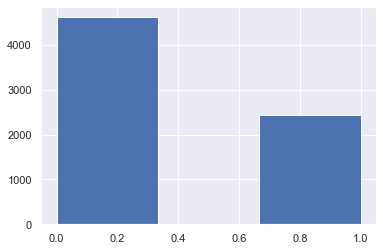

In [19]:
print(X_copy.YesOnlineBackup.describe())
X_copy.YesOnlineBackup.hist(bins=3)

count    7043.000000
mean        0.343888
std         0.475038
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: YesDeviceProtection, dtype: float64


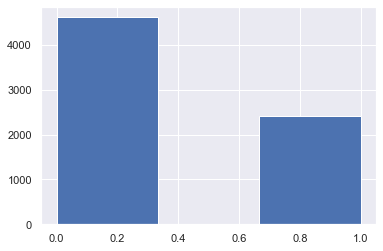

In [20]:
print(X_copy.YesDeviceProtection.describe())
X_copy.YesDeviceProtection.hist(bins=3)

count    7043.000000
mean        0.290217
std         0.453895
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: YesTechSupport, dtype: float64


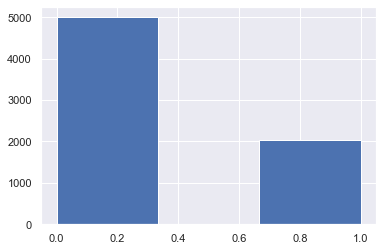

In [21]:
print(X_copy.YesTechSupport.describe())
X_copy.YesTechSupport.hist(bins=3)

count    7043.000000
mean        0.384353
std         0.486477
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: YesStreamingTV, dtype: float64


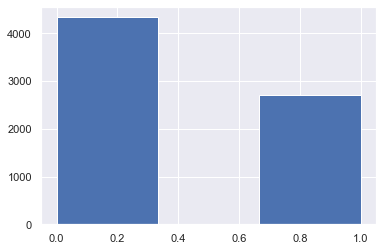

In [22]:
print(X_copy.YesStreamingTV.describe())
X_copy.YesStreamingTV.hist(bins=3)

count    7043.000000
mean        0.387903
std         0.487307
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: YesStreamingMovies, dtype: float64


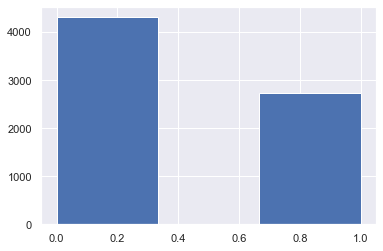

In [23]:
print(X_copy.YesStreamingMovies.describe())
X_copy.YesStreamingMovies.hist(bins=3)

count    7043.000000
mean        0.550192
std         0.497510
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: ContractMonthly, dtype: float64


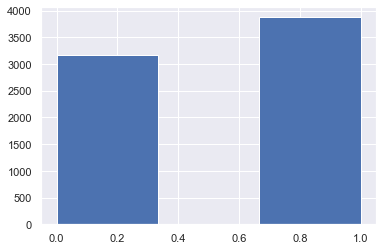

In [24]:
print(X_copy.ContractMonthly.describe())
X_copy.ContractMonthly.hist(bins=3)

count    7043.000000
mean        0.209144
std         0.406726
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: ContractOneYear, dtype: float64


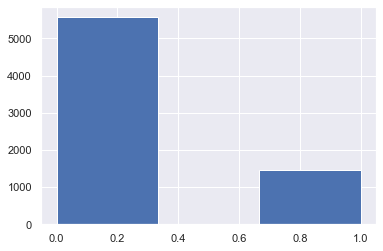

In [25]:
print(X_copy.ContractOneYear.describe())
X_copy.ContractOneYear.hist(bins=3)

count    7043.000000
mean        0.240664
std         0.427517
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: ContractTwoYear, dtype: float64


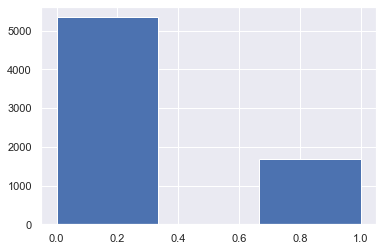

In [26]:
print(X_copy.ContractTwoYear.describe())
X_copy.ContractTwoYear.hist(bins=3)

count    7043.000000
mean        0.592219
std         0.491457
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: YesPaperlessBilling, dtype: float64


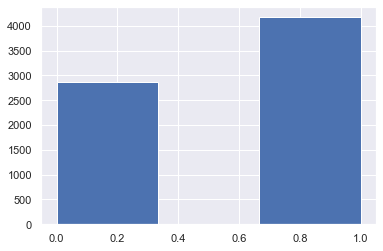

In [27]:
print(X_copy.YesPaperlessBilling.describe())
X_copy.YesPaperlessBilling.hist(bins=3)

count    7043.000000
mean        0.335794
std         0.472301
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: YesElectronicCheck, dtype: float64


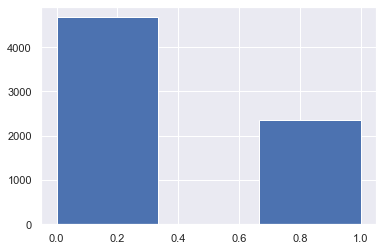

In [28]:
print(X_copy.YesElectronicCheck.describe())
X_copy.YesElectronicCheck.hist(bins=3)

count    7043.000000
mean        0.335794
std         0.472301
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: YesElectronicCheck, dtype: float64


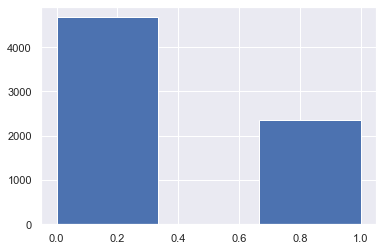

In [29]:
print(X_copy.YesElectronicCheck.describe())
X_copy.YesElectronicCheck.hist(bins=3)

count    7043.000000
mean        0.228880
std         0.420141
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: YesMailedCheck, dtype: float64


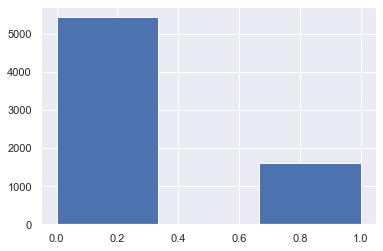

In [30]:
print(X_copy.YesMailedCheck.describe())
X_copy.YesMailedCheck.hist(bins=3)

count    7043.000000
mean        0.219225
std         0.413751
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: YesBankTransfer, dtype: float64


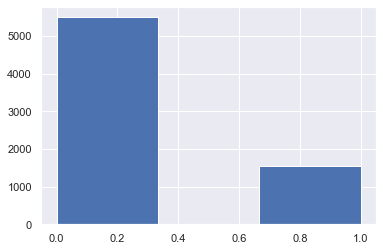

In [31]:
print(X_copy.YesBankTransfer.describe())
X_copy.YesBankTransfer.hist(bins=3)

count    7043.000000
mean        0.216101
std         0.411613
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: YesCreditCard, dtype: float64


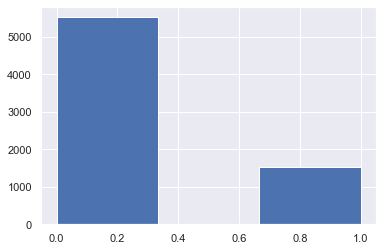

In [32]:
print(X_copy.YesCreditCard.describe())
X_copy.YesCreditCard.hist(bins=3)

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64


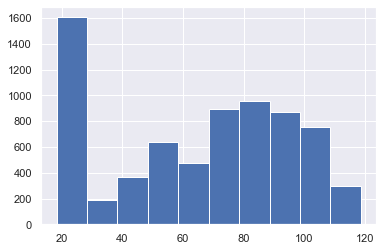

In [33]:
print(X_copy.MonthlyCharges.describe())
X_copy.MonthlyCharges.hist()

count    7043.000000
mean     2283.300441
std      2265.000258
min        18.800000
25%       402.225000
50%      1400.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64


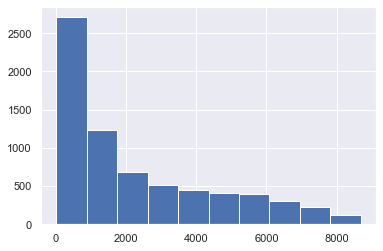

In [34]:
print(X_copy.TotalCharges.describe())
X_copy.TotalCharges.hist()

count    7043.000000
mean        0.265370
std         0.441561
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: YesChurn, dtype: float64


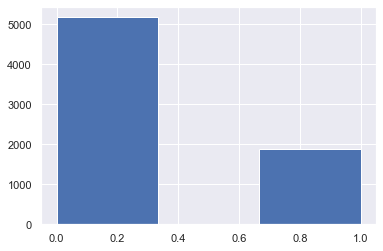

In [35]:
print(y_copy.describe())
y_copy.hist(bins=3)

In [36]:
# Fit model
churn_model = DecisionTreeRegressor(random_state=1)
churn_model.fit(X_copy,y_copy)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [37]:
print("churn predictions for head")
print(X_copy.head())
print(churn_model.predict(X_copy))


churn predictions for head
   OneMale  YesSenior  YesPartner  YesDependents  Tenure  YesPhoneService  \
0      0.0        0.0         1.0            0.0     1.0              0.0   
1      1.0        0.0         0.0            0.0    34.0              1.0   
2      1.0        0.0         0.0            0.0     2.0              1.0   
3      1.0        0.0         0.0            0.0    45.0              0.0   
4      0.0        0.0         0.0            0.0     2.0              1.0   

   YesInternetService  YesDSL  YesFiberOptic  YesMultiLines  ...  \
0                 1.0     1.0            0.0            0.0  ...   
1                 1.0     1.0            0.0            0.0  ...   
2                 1.0     1.0            0.0            0.0  ...   
3                 1.0     1.0            0.0            0.0  ...   
4                 1.0     0.0            1.0            0.0  ...   

   ContractMonthly  ContractOneYear  ContractTwoYear  YesPaperlessBilling  \
0              1.0      

In [38]:
predicted_churn = churn_model.predict(X_copy)
mean_absolute_error(y, predicted_churn)

0.0028160348336409673

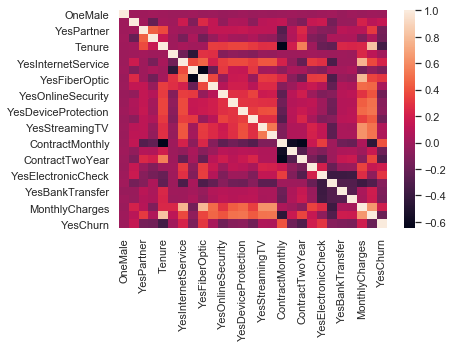

In [39]:
corr = churn_data.corr()
sns.heatmap(corr)

#corr.style.background_gradient().set_precision(2)
  


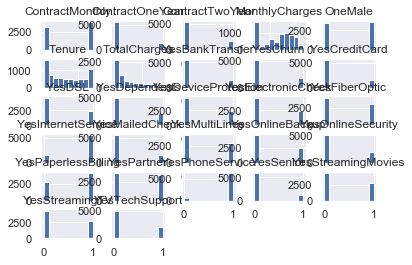

In [40]:
churn_data.hist()
plt.show()

In [44]:
churn_corr = churn_data[churn_data.columns[1:]].corr()['YesChurn'][:-1]
churn_corr_ordered = churn_corr.sort_values()
churn_corr_ordered

Tenure                -0.352229
ContractTwoYear       -0.302253
TotalCharges          -0.199484
ContractOneYear       -0.177820
YesOnlineSecurity     -0.171226
YesTechSupport        -0.164674
YesDependents         -0.164221
YesPartner            -0.150448
YesCreditCard         -0.134302
YesDSL                -0.124214
YesBankTransfer       -0.117937
YesMailedCheck        -0.091683
YesOnlineBackup       -0.082255
YesDeviceProtection   -0.066160
OneMale               -0.008612
YesPhoneService        0.011942
YesMultiLines          0.040102
YesStreamingMovies     0.061382
YesStreamingTV         0.063228
YesSenior              0.150889
YesPaperlessBilling    0.191825
MonthlyCharges         0.193356
YesInternetService     0.227890
YesElectronicCheck     0.301919
YesFiberOptic          0.308020
ContractMonthly        0.405103
Name: YesChurn, dtype: float64

In [62]:

pd.crosstab(churn_data.YesChurn, churn_data.Tenure)


Tenure,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0
YesChurn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,11,233,115,106,93,69,70,80,81,73,71,68,79,71,52,62,52,61,73,54,53,46,63,72,71,56,64,59,45,57,56,49,50,50,53,73,40,50,46,42,51,56,51,50,45,55,62,54,55,51,58,60,72,56,55,55,70,57,56,52,70,68,65,68,76,67,76,88,91,87,108,164,356
1.0,0,380,123,94,83,64,40,51,42,46,45,31,38,38,24,37,28,26,24,19,18,17,27,13,23,23,15,13,12,15,16,16,19,14,12,15,10,15,13,14,13,14,14,15,6,6,12,14,9,15,10,8,8,14,13,9,10,8,11,8,6,8,5,4,4,9,13,10,9,8,11,6,6


In [50]:
pd.crosstab(churn_data.YesChurn, churn_data.ContractTwoYear)

ContractTwoYear,0.0,1.0
YesChurn,,
0.0,3527,1647
1.0,1821,48


In [51]:
pd.crosstab(churn_data.YesChurn, churn_data.YesElectronicCheck)

YesElectronicCheck,0.0,1.0
YesChurn,,
0.0,3880,1294
1.0,798,1071


In [52]:
pd.crosstab(churn_data.YesChurn, churn_data.YesFiberOptic)

YesFiberOptic,0.0,1.0
YesChurn,,
0.0,3375,1799
1.0,572,1297


In [53]:
pd.crosstab(churn_data.YesChurn, churn_data.ContractMonthly)

ContractMonthly,0.0,1.0
YesChurn,,
0.0,2954,2220
1.0,214,1655


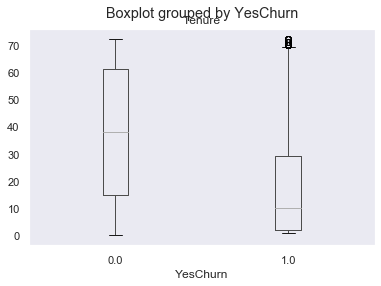

In [58]:
churn_data.boxplot(by = "YesChurn", column = ["Tenure"], grid=False)